# **Decision Tree Exploration**

# Previous Code

In [1]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn, etc.

In [2]:
#import datasets as Pandas dataframes
#NOTE: the filepath may be different for each user
main_dataset = pd.read_csv('Datasets/Clean_Dataset.csv')
business_df = pd.read_csv('Datasets/business.csv')
economy_df = pd.read_csv('Datasets/economy.csv')

In [3]:
main_dataset.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
print(list(main_dataset.columns))
print(main_dataset.shape)

['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']
(300153, 12)


In [5]:
business_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [6]:
print(list(business_df.columns))
print(business_df.shape)

['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'price']
(93487, 11)


In [7]:
economy_df.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [8]:
print(list(economy_df.columns))
print(economy_df.shape)

['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'time_taken', 'stop', 'arr_time', 'to', 'price']
(206774, 11)


In [9]:
206774+93487

300261

In [10]:
business_df.loc[business_df['price'] == '25,612']

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
35,12-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
36,12-02-2022,Air India,AI,887,07:00,Delhi,02h 05m,non-stop,09:05,Mumbai,"25,612"
37,12-02-2022,Air India,AI,665,08:00,Delhi,02h 10m,non-stop,10:10,Mumbai,"25,612"
38,12-02-2022,Air India,AI,805,20:00,Delhi,02h 10m,non-stop,22:10,Mumbai,"25,612"
39,12-02-2022,Air India,AI,678,09:00,Delhi,02h 15m,non-stop,11:15,Mumbai,"25,612"
40,12-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
41,12-02-2022,Air India,AI,636,14:30,Delhi,03h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\...,18:00,Mumbai,"25,612"
42,12-02-2022,Air India,AI,441,17:50,Delhi,03h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\...,21:35,Mumbai,"25,612"


In [11]:
main_dataset.loc[main_dataset['price'] == 25612]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206666,206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612
206667,206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612
206701,206701,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,2,25612
206702,206702,Air_India,AI-887,Delhi,Early_Morning,zero,Morning,Mumbai,Business,2.08,2,25612
206703,206703,Air_India,AI-665,Delhi,Early_Morning,zero,Morning,Mumbai,Business,2.17,2,25612
206704,206704,Air_India,AI-805,Delhi,Evening,zero,Night,Mumbai,Business,2.17,2,25612
206705,206705,Air_India,AI-678,Delhi,Morning,zero,Morning,Mumbai,Business,2.25,2,25612
206706,206706,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,2,25612
206707,206707,Air_India,AI-636,Delhi,Afternoon,one,Evening,Mumbai,Business,3.50,2,25612
206708,206708,Air_India,AI-441,Delhi,Evening,one,Night,Mumbai,Business,3.75,2,25612


In [12]:
len(main_dataset.loc[main_dataset['price'] == 25612]) == len(business_df.loc[business_df['price'] == '25,612'])

True

We can see that the cleaned dataset is a combination of the business and economy class flights with a few modifications (~100 dropped flights, prices converted from strings to ints, etc.).

However, there are some immediate, glaring issues that should be taken care of:

- We need to drop the unnamed column
- We should convert the 'stops' (number of stops per flight) from categorical data to numerical data
- We should fix some of the names for better readability (e.g. 'days_left' refers to number of days between booking and vacation, but this isn't obvious)

Additionally, for quality of life, we may drop some columns we are less interested in working with. This would be done in a new dataframe, however, and will likely be done after we find some sort of test metric for usability (for example, we do not expect flight serial number to be a good predictor of price).

In [4]:
main_dataset = main_dataset.drop(columns = ['Unnamed: 0'])

In [14]:
print(main_dataset['stops'].unique())
def strtonum(ele):
    if ele == 'zero':
        num = 0
            
    elif ele == 'one':
        num = 1
            
    else:
        num = 2
            
    return num

main_dataset['stops'] = main_dataset['stops'].apply(strtonum)

['zero' 'one' 'two_or_more']


In [15]:
#main_dataset['days_left'] = main_dataset['days_left'].rename('hi') when we think of a name
main_dataset.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [16]:
main_dataset.isnull().any()

airline             False
flight              False
source_city         False
departure_time      False
stops               False
arrival_time        False
destination_city    False
class               False
duration            False
days_left           False
price               False
dtype: bool

Using ExtraTreesRegressor to determine which features play the largest role in determining flight price

In [5]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder

extra_trees_data = main_dataset

#Label Encoder encodes target labels with values between 0 and n_classes-1
#Labels are then normalized using the encoder
encoder = LabelEncoder()
extra_trees_data = extra_trees_data.drop(['flight'],axis=1)
extra_trees_data['airline'] = encoder.fit_transform(extra_trees_data['airline'])
extra_trees_data['source_city'] = encoder.fit_transform(extra_trees_data['source_city'])
extra_trees_data['departure_time'] = encoder.fit_transform(extra_trees_data['departure_time'])
extra_trees_data['stops'] = encoder.fit_transform(extra_trees_data['stops'])
extra_trees_data['arrival_time'] = encoder.fit_transform(extra_trees_data['arrival_time'])
extra_trees_data['destination_city'] = encoder.fit_transform(extra_trees_data['destination_city'])
extra_trees_data['class'] = encoder.fit_transform(extra_trees_data['class'])

X = extra_trees_data.drop('price', axis=1)
y = extra_trees_data['price']

In [18]:
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [19]:
data = {
    'Feature' : X.columns.tolist(),
    'Importance' : selection.feature_importances_
}

selection_output = pd.DataFrame(data).sort_values(by='Importance', ascending=False)
selection_output

,Feature,Importance
6,class,0.880371
3,stops,0.031734
7,duration,0.026881
8,days_left,0.018426
0,airline,0.011287
5,destination_city,0.010434
1,source_city,0.010425
4,arrival_time,0.005334
2,departure_time,0.005108


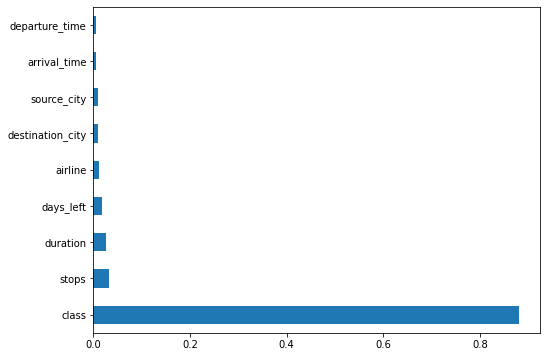

In [20]:
plt.figure(figsize = (8,6))
feature_importance_levels = pd.Series(selection.feature_importances_, index=X.columns)
feature_importance_levels.nlargest(20).plot(kind='barh')
plt.show()

- You can see that some features are vastly more 'important' to predicting price
- The 'class' of flight (business vs economy) is magnitude more influential

#### Linear Regression

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
#using all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.9045476949563359

In [23]:
#dropping the four least impactful features
X1 = X.drop(['departure_time', 'arrival_time', 'destination_city', 'source_city'], axis=1)
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size = 0.20)
reg1 = LinearRegression().fit(X1_train, y_train)
reg1.score(X1_train, y_train)

0.9057681659877818

In [24]:
#using just 'duration,' 'stops,' and 'class.'
X2 = X1.drop(['airline', 'days_left'], axis=1)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.20)
reg1 = LinearRegression().fit(X2_train, y_train)
reg1.score(X2_train, y_train)

0.8940675801077274

In [25]:
#using just 'class'
X3 = X2.drop(['duration', 'stops'], axis=1)
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size = 0.20)
reg1 = LinearRegression().fit(X3_train, y_train)
reg1.score(X3_train, y_train)

0.8799501519915867

Lets see what happens if we regress within each 'class' of ticket

In [26]:
business_trees = extra_trees_data[extra_trees_data['class'] == 1]
business_trees.get('class').unique()

array([1])

In [27]:
#Looking at all features within the the business class
XB = business_trees.drop('price', axis=1)
y = business_trees['price']
XB_train, XB_test, y_train, y_test = train_test_split(XB, y, test_size = 0.20)
reg1 = LinearRegression().fit(XB_train, y_train)
reg1.score(XB_train, y_train)

0.4469341137792372

In [28]:
economy_trees = extra_trees_data[extra_trees_data['class'] == 0]
economy_trees.get('class').unique()

array([0])

In [29]:
#Looking at all features within the the economy class
XE = economy_trees.drop('price', axis=1)
y = economy_trees['price']
XE_train, XE_test, y_train, y_test = train_test_split(XE, y, test_size = 0.20)
reg1 = LinearRegression().fit(XE_train, y_train)
reg1.score(XE_train, y_train)

0.4615643084014175

# Decision Tree Exploration

The second model we considered for our analysis was the Decision Tree Classifier.

In [8]:
from sklearn.model_selection import cross_val_score, RepeatedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.tree import export_text
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
X = extra_trees_data.drop('price', axis=1)
y = extra_trees_data['price']

feature_names = X.columns
labels = ["".join(item) for item in y.unique().astype(str)]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

The goal of our decision tree is to find a classifier that is able to show the decisions leading up to the price of each ticket.

In [32]:
dTree = DecisionTreeClassifier(max_depth = None, random_state = 42)
dTree.fit(X_train, y_train)
y_pred_dTree = dTree.predict(X_test)

In [33]:
print(dTree.get_depth())

40


To establish a baseline, we first let the classifier run without a max depth to see how large the tree gets naturally based on the data.

In [34]:
# plt.figure(figsize=(40,50), facecolor='w')

# a = tree.plot_tree(dTree,
#                    feature_names = feature_names,
#                    class_names = labels,
#                    rounded = True,
#                    filled = True,
#                    fontsize = 14
#                    )
# plt.show()          

In [35]:
tree_rules = export_text(dTree,
                         feature_names = list(feature_names))

# with open("treeText.txt", "w") as external_file:
#     print(tree_rules, file=external_file)
#     external_file.close()

In [36]:
print("Training Accuracy:",metrics.accuracy_score(y_train, dTree.predict(X_train)))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_dTree))

Training Accuracy: 0.9878195047842426
Testing Accuracy: 0.6847372699529578


- Unlike the linear regression model, we can see that the decision tree can see how impactful 'class' is and uses it as its first split
- Interestingly, the decision tree then splits by desination city and source city which were identified earlier as not being too impactful.
- The training accuracy of this classifier is very high, but the testing accuracy is much lower which could indicate that the model does not generalize well.

The next step will be to tune the hyperparameters to get the best accuracy without overfitting and we will do so with a GridSearch.

In [37]:
param = {
    "max_depth": [10,40,60],
    "min_samples_split":[20,40,60,80],
    "min_impurity_decrease": [0.0001, 0.001, 0.01]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = param, cv = 10, verbose = 1, n_jobs = -1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 40, 60],
                         'min_impurity_decrease': [0.0001, 0.001, 0.01],
                         'min_samples_split': [20, 40, 60, 80]},
             verbose=1)

In [38]:
grid.best_params_
#{'max_depth': 40, 'min_impurity_decrease': 0.0001, 'min_samples_split': 20}

{'max_depth': 40, 'min_impurity_decrease': 0.0001, 'min_samples_split': 20}

In [39]:
grid.best_estimator_
# DecisionTreeClassifier(max_depth=40, min_impurity_decrease=0.0001,
#                        min_samples_split=20, random_state=42)

DecisionTreeClassifier(max_depth=40, min_impurity_decrease=0.0001,
                       min_samples_split=20, random_state=42)

In [40]:
grid.best_score_
# 0.5068143509607574

0.5068143509607574

After doing some research we decided to vary the tree parameters max_depth, min_samples_split, and min_impurity_decrease. We tried many ranges and combinations of these parameters and although this manual search was not exhaustive, we were able to narrow it down to one set of parameters that got the best accuracy within our search.

The best combination of the parameters was: 
{'max_depth': 40, 'min_impurity_decrease': 0.0001, 'min_samples_split': 20}

In [41]:
dTree_best = DecisionTreeClassifier(max_depth = 40, random_state = 42, min_impurity_decrease = 0.0001, min_samples_split = 20)
dTree_best.fit(X_train, y_train)
y_pred_dTree_best = dTree_best.predict(X_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, dTree_best.predict(X_train)))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_dTree_best))

Training Accuracy: 0.5119184057855131
Testing Accuracy: 0.5047508628846333


With this tuned classifier we get the accuracies above.

## DecisionTreeRegressor

Next we resarched a bit more and found a Regressor option with the Decision Tree so we explored that a bit with the same tuned hyperparameters to see how it compares to our exploration with the LinearRegression earlier. We also wanted to explore how the accuracy would be effected if instead of "classifying" each prediction as one of the many prices the model regressing to predict a unique price point.

In [42]:
dTree_best = DecisionTreeRegressor(max_depth = 40, random_state = 42, min_impurity_decrease = 0.0001, min_samples_split = 20)
dTree_best.fit(X_train, y_train)
y_pred_dTree_best = dTree_best.predict(X_test)

In [43]:
dTree_best.predict(X_train)

array([41925.11111111, 29979.38461538,  4251.        , ...,
        5114.85714286,  5853.53846154,  6864.33333333])

In [44]:
data = {"price": np.asarray(y_test), 
        "pred": y_pred_dTree_best}
out = pd.DataFrame(data)
out["diff"] = out["price"] - out["pred"]

#Dataframe showcasing the difference in the values
out

,price,pred,diff
0,7366,7494.750000,-128.750000
1,64831,69115.000000,-4284.000000
2,6195,6195.000000,0.000000
3,60160,61682.578947,-1522.578947
4,6578,6630.500000,-52.500000
...,...,...,...
75034,14243,12913.200000,1329.800000
75035,4500,4500.000000,0.000000
75036,5232,5385.461538,-153.461538
75037,58315,58315.000000,0.000000


In [45]:
#Dataframe showing how many values were not predicted exactly
out = out[out.get("price") != out.get("pred")]
print(out)

#RMSE and MAE value calculation
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_dTree_best)))
print("MAE: ", mean_absolute_error(y_test, y_pred_dTree_best))

       price          pred         diff
0       7366   7494.750000  -128.750000
1      64831  69115.000000 -4284.000000
3      60160  61682.578947 -1522.578947
4       6578   6630.500000   -52.500000
5       4555   5617.000000 -1062.000000
...      ...           ...          ...
75031   3014   3686.750000  -672.750000
75033   6270   5954.764706   315.235294
75034  14243  12913.200000  1329.800000
75036   5232   5385.461538  -153.461538
75038   2877   2683.722222   193.277778

[51350 rows x 3 columns]
RMSE:  3003.7394485653826
MAE:  1220.8235647611773


These values are much better than the values we had gotten for the LinearRegression, and in fact the values are almost half of what we found earlier.

## Bucketed Decision Tree

Next, we bucketed the prices to see if we could improve accuracy. "Bucketed" meaning that we grouped prices in a range and instead of the classifier having to predict exact prices, it would predict a bucket (or a range).

In [46]:
bucket_price = extra_trees_data.get("price")
len(bucket_price), len(bucket_price.unique())

(300153, 12157)

In [47]:
extra_trees_data["bucket_price"] = bucket_price
bins = np.arange(0, 100000, 1000)
extra_trees_data["bucket_price"] = pd.cut(extra_trees_data.bucket_price, bins).apply(lambda x: x.left)

In [48]:
extra_trees_data = extra_trees_data.dropna()

In [49]:
X = extra_trees_data.drop('price', axis=1)
X = X.drop('bucket_price', axis=1)
y = extra_trees_data['bucket_price']

feature_names = X.columns
labels = ["".join(item) for item in y.unique().astype(str)]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [50]:
param = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [None, 5, 10, 20, 30, 40, 50, 60],
    "max_features": [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    "min_samples_split":[5, 10, 20, 30, 40, 60, 80],
    "min_impurity_decrease": [0.00001, 0.0001, 0.001, 0.01]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid = param, cv = 10, verbose = 1, n_jobs = -1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 3136 candidates, totalling 31360 fits


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_score_

In [ ]:
dTree_best = grid.best_estimator_
dTree_best.fit(X_train, y_train)
y_pred_dTree_best = dTree_best.predict(X_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, dTree_best.predict(X_train)))
print("Testing Accuracy:",metrics.accuracy_score(y_test, y_pred_dTree_best))

As predicted, the accuracies are much higher than without the bucketing. 

In [ ]:
out = X_test
out["prediction"] = y_pred_dTree_best
out["diff"] = out["prediction"] - y_pred_dTree_best
out[out.get("diff") != 0]
out.get("diff").unique()

In [ ]:
data = {"bucket": np.asarray(y_test), 
        "pred": y_pred_dTree_best}
out = pd.DataFrame(data)
out = out[out.get("bucket") != out.get("pred")]
out.get("bucket")
out["diff"] = out["bucket"] - out["pred"]
out

In [ ]:
# on average, each misclassification was off by just over 1 'bucket'
np.mean(out["diff"]) / 1000, np.median(out["diff"]) / 1000

On average each misclassification that our model had was off by just over 1 "bucket". For the purposes of our model, this error is still pretty useful because when predicting a price for a ticket one of our buckets gives the user a good estimate of their flight price. 

## RandomForest Exploration

Lastly we began some exploration with RandomForests as well. 

In [11]:
from sklearn.ensemble import RandomForestClassifier
forrest_test = RandomForestClassifier(criterion = 'entropy',
                                      max_depth = 30,
                                      min_impurity_decrease=1e-05,
                                      min_samples_split=5,
                                      random_state=42)

forrest_test.fit(X_train, y_train)
forrest_pred = forrest_test.predict(X_test)
print("Training Accuracy:",metrics.accuracy_score(y_train, forrest_test.predict(X_train)))
print("Testing Accuracy:",metrics.accuracy_score(y_test, forrest_pred))

MemoryError: could not allocate 1472331776 bytes